In [1]:
import sys, os
import importlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sys.path.append(os.path.abspath(".."))

In [3]:
import src.eda_univariate
import src.eda_bivariate
from src.artifacts import load_df
from src.config import  CLEAN_PARQUET
importlib.reload(src.eda_univariate)
importlib.reload(src.eda_bivariate)
from src.eda_univariate import (
    target_distribution,
    data_quality_report
)
from src.eda_bivariate import (
    pointbiserial_analysis,categorical_analysis,approval_rate_by_feature,approval_summary,draw_business_insights
)



In [4]:
df = load_df(CLEAN_PARQUET)
print("Encoded shape:", df.shape)
df.head()

Encoded shape: (614, 13)


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.0,5849,0.0,128.0,360.0,1.0,True,False,False,False,False,True,True
1,1.0,4583,1508.0,128.0,360.0,1.0,True,True,False,False,False,False,False
2,0.0,3000,0.0,66.0,360.0,1.0,True,True,False,True,False,True,True
3,0.0,2583,2358.0,120.0,360.0,1.0,True,True,True,False,False,True,True
4,0.0,6000,0.0,141.0,360.0,1.0,True,False,False,False,False,True,True


In [5]:
data_quality_report(df)


===== DATA QUALITY REPORT =====
                         Missing Values  Missing %  Unique Values
Dependents                            0        0.0              4
ApplicantIncome                       0        0.0            505
CoapplicantIncome                     0        0.0            287
LoanAmount                            0        0.0            203
Loan_Amount_Term                      0        0.0             10
Credit_History                        0        0.0              2
Gender_Male                           0        0.0              2
Married_Yes                           0        0.0              2
Education_Not Graduate                0        0.0              2
Self_Employed_Yes                     0        0.0              2
Property_Area_Semiurban               0        0.0              2
Property_Area_Urban                   0        0.0              2
Loan_Status_Y                         0        0.0              2

👉 Business Insights:
   - No column has ex


===== Target Variable: Loan_Status_Y =====
               Count  Percent
Loan_Status_Y                
True             422    68.73
False            192    31.27
👉 Approval rate: NA% | Rejection rate: NA%


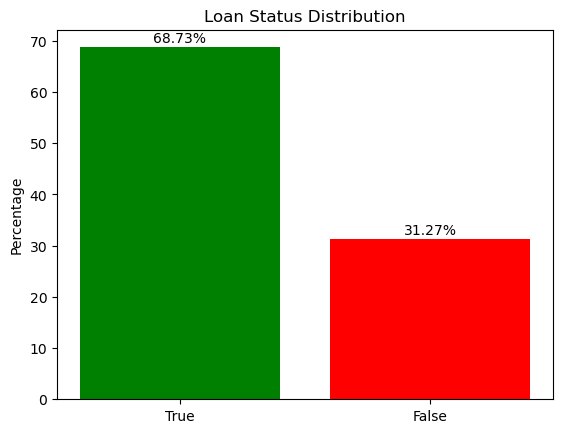

In [6]:
target_distribution(df)

In [7]:
# Run for numeric features
res = pointbiserial_analysis(df, target="Loan_Status_Y",
                             num_features=["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"])

print(res)

             Feature   Corr    P-Value                 Interpretation
0    ApplicantIncome -0.005  9.073e-01  ❌ No significant relationship
1   Loan_Amount_Term -0.023  5.771e-01  ❌ No significant relationship
2         LoanAmount -0.033  4.113e-01  ❌ No significant relationship
3  CoapplicantIncome -0.059  1.429e-01  ❌ No significant relationship


In [8]:
cat_features = [
    "Dependents","Credit_History",
    "Gender_Male","Married_Yes","Education_Not Graduate",
    "Self_Employed_Yes","Property_Area_Semiurban","Property_Area_Urban"
]
res_cat = categorical_analysis(df, target="Loan_Status_Y",
                               cat_features=cat_features)

for row in res_cat:
    print(row)

Dependents                | Chi²=   3.151 | P=3.689e-01 | V=0.072 | ❌ None
Credit_History            | Chi²= 176.115 | P=3.418e-40 | V=0.536 | ✔️ Strong
Gender_Male               | Chi²=   0.111 | P=7.391e-01 | V=0.013 | ❌ None
Married_Yes               | Chi²=   4.732 | P=2.961e-02 | V=0.088 | ℹ️ Weak but significant
Education_Not Graduate    | Chi²=   4.091 | P=4.310e-02 | V=0.082 | ℹ️ Weak but significant
Self_Employed_Yes         | Chi²=   0.000 | P=1.000e+00 | V=0.000 | ❌ None
Property_Area_Semiurban   | Chi²=  10.848 | P=9.890e-04 | V=0.133 | ⚠️ Moderate
Property_Area_Urban       | Chi²=   0.977 | P=3.230e-01 | V=0.040 | ❌ None


In [9]:
# Approval by gender
print("🔹 Approval Rate by Gender (using Gender_Male dummy):")
print(approval_rate_by_feature(df, "Gender_Male"))

# Approval by credit history
print("\n🔹 Approval Rate by Credit History:")
print(approval_rate_by_feature(df, "Credit_History"))

🔹 Approval Rate by Gender (using Gender_Male dummy):
   Gender_Male  Approval %
0        False   66.964286
1         True   69.123506

🔹 Approval Rate by Credit History:
   Credit_History  Approval %
0             0.0    7.865169
1             1.0   79.047619


In [10]:
# Reconstruct Property_Area column from dummies
df["Property_Area"] = np.where(df["Property_Area_Urban"] == 1, "Urban",
                         np.where(df["Property_Area_Semiurban"] == 1, "Semiurban", "Rural"))

print(approval_summary(df, "Property_Area", target="Loan_Status_Y"))


Loan_Status_Y  False  True  All  Approval %
Property_Area                              
Rural             69   110  179        61.5
Semiurban         54   179  233        76.8
Urban             69   133  202        65.8
All              192   422  614        68.7


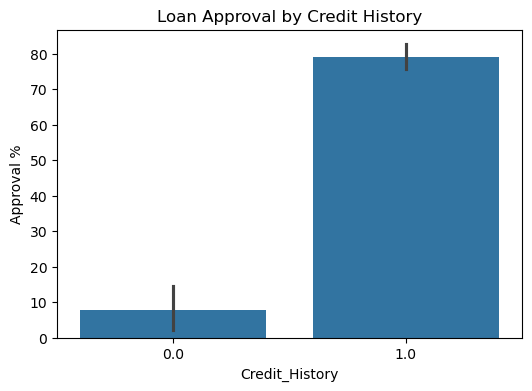

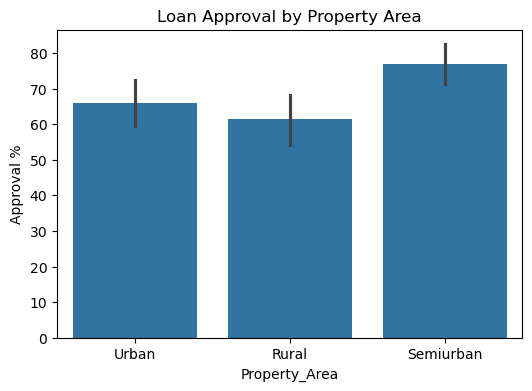

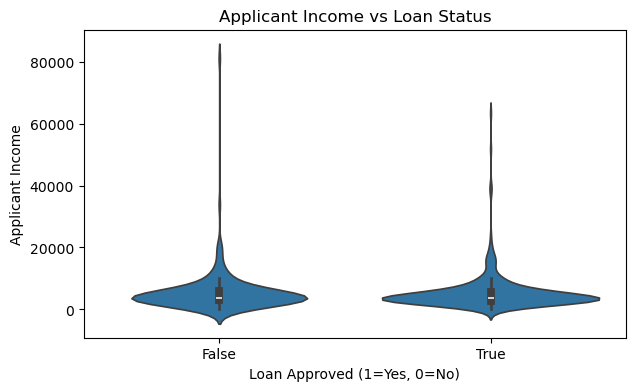

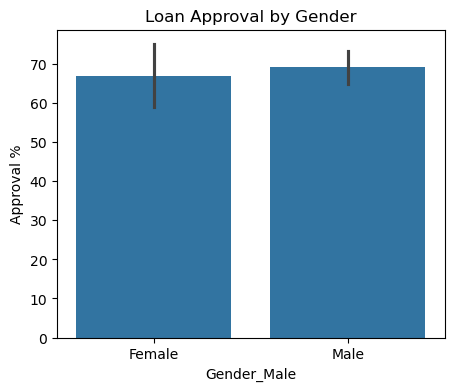

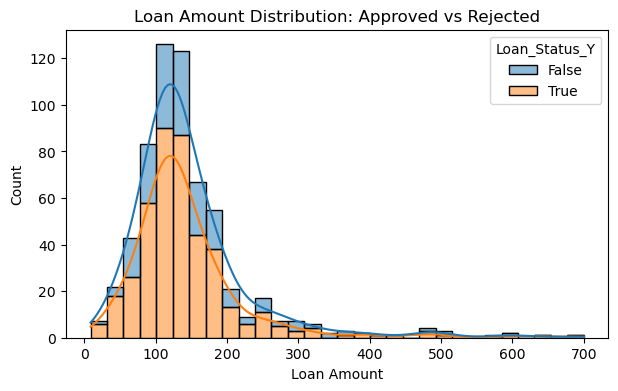

In [11]:
draw_business_insights(df, target="Loan_Status_Y")
